In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
from sklearn.naive_bayes import ComplementNB

In [2]:
X_train, X_test, y_train, y_test = pickle.load(open('data', 'rb'))

# The most simple choice for this problem is Naive Bayes Model

## I transform the data and target s.t. samples are duplicated with all the conversions as one output

In [3]:
def transform_to_onelab(X, y, lab=1):
    i, j = np.where(y==lab)
    X_new = X[i]
    y_new = j
    return X_new, y_new

X_train_pos, y_train_pos = transform_to_onelab(X_train, y_train)

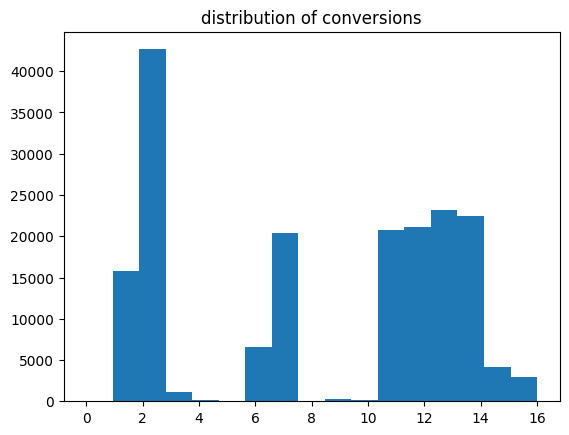

In [4]:
plt.hist(y_train_pos, bins=17)
plt.title('distribution of conversions')
plt.show()

In [5]:
nb = ComplementNB() #It is particularly suited for imbalanced data sets
nb.fit(X_train_pos, y_train_pos)

ComplementNB()

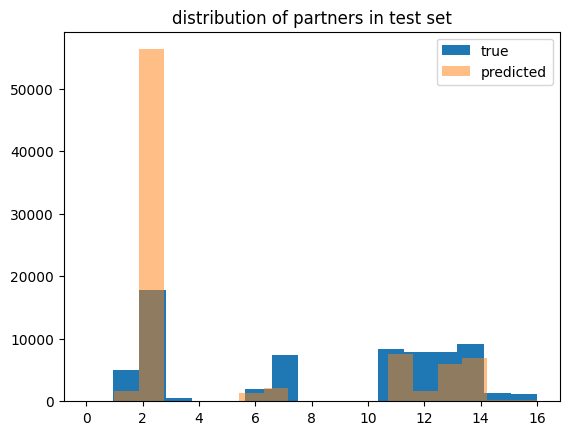

In [6]:
X_test_pos, y_test_pos = transform_to_onelab(X_test, y_test)
plt.hist(y_test_pos, label='true', bins=17)

y_pred = nb.predict(X_test)
plt.hist(y_pred, label='predicted', bins=17, alpha=0.5)


plt.legend()
plt.title('distribution of partners in test set')
plt.show()

In [7]:
def get_error_rate(y_pred, y_test, test_over=-1):
    '''Calculates proportion of samples that were predicted as conversion but were actually a rejection'''
    set_i, set_j = np.where(y_test==test_over) # negative samples
    d = {} #dict d collects index of test redirect as key and partners that rejected as values
    for i, el in enumerate(set_i):
        if el not in d:
            d[el]=[set_j[i]]
        else:
            d[el].append(set_j[i])
    # if predicted top 1 sample is actually is rejection it is considered an error
    error_rate = np.array([y_pred[i] in d[i] for i in d.keys()]).sum()/len(d)
    return error_rate

In [8]:
get_error_rate(y_pred, y_test)

0.5537238310598877

In [9]:
get_error_rate(y_pred, y_test, test_over=1) # predicted correctly as conversion

0.40100152192056554

## Maybe bad result caused by severe class disbalance, let's remove half of the elements that were accepted by the second partner

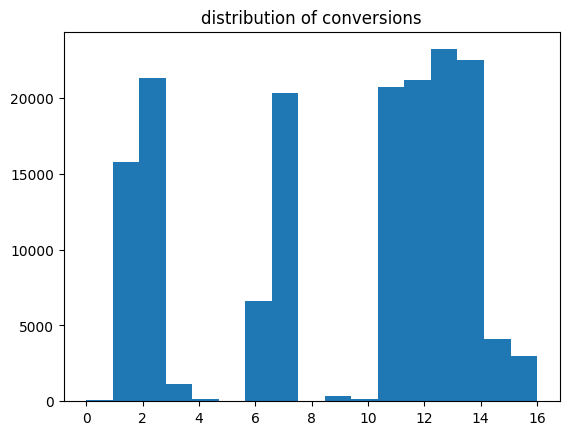

In [10]:
X_train_pos = np.delete(X_train_pos, np.where(y_train_pos==2)[0][::2], axis=0)
y_train_pos = np.delete(y_train_pos, np.where(y_train_pos==2)[0][::2])


plt.hist(y_train_pos, bins=17)
plt.title('distribution of conversions')
plt.show()

In [11]:
nb = ComplementNB() #It is particularly suited for imbalanced data sets
nb.fit(X_train_pos, y_train_pos)

ComplementNB()

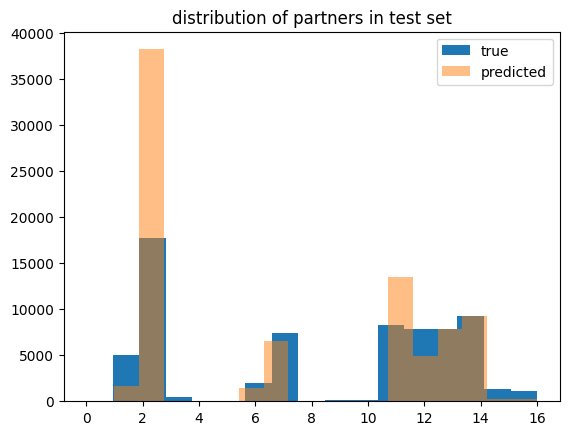

In [12]:
X_test_pos, y_test_pos = transform_to_onelab(X_test, y_test)
plt.hist(y_test_pos, label='true', bins=17)

y_pred = nb.predict(X_test)
plt.hist(y_pred, label='predicted', bins=17, alpha=0.5)

plt.legend()
plt.title('distribution of partners in test set')
plt.show()

In [13]:
get_error_rate(y_pred, y_test)

0.5455783305371167

In [14]:
get_error_rate(y_pred, y_test, test_over=1) # predicted correctly as conversion

0.3773381118366145

## Another idea is to train for rejection and take as top 1 convergance - least likely to be rejected

In [15]:
X_train_neg, y_train_neg = transform_to_onelab(X_train, y_train, -1)
nb_neg = ComplementNB() #It is particularly suited for imbalanced data sets
nb_neg.fit(X_train_neg, y_train_neg)

y_pred = nb_neg.predict_proba(X_test).argmin(1)

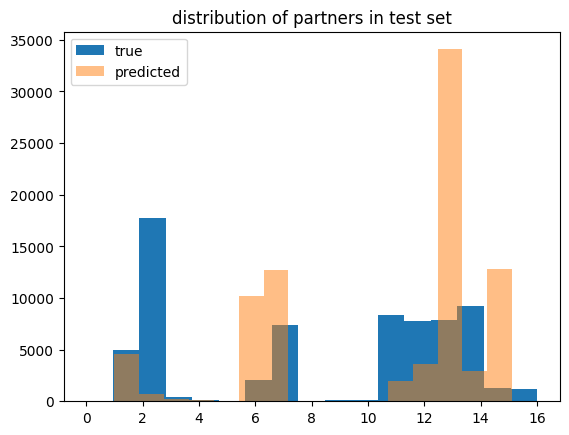

In [16]:
plt.hist(y_test_pos, label='true', bins=17)
plt.hist(y_pred, label='predicted', bins=17, alpha=0.5)

plt.legend()
plt.title('distribution of partners in test set')
plt.show()

In [17]:
get_error_rate(y_pred, y_test)

0.29909791621076176

In [18]:
get_error_rate(y_pred, y_test, test_over=1) # predicted correctly as conversion

0.10268054396386667

## The prediction is not a rejection in 30% cases, but it is truly a conversion only in 10% cases

# It seems like this model is not a good fit for our problem. Let's try other ML models: KNN and Random Forest